In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import openpyxl
import xlsxwriter
import statsmodels.api as sm
from random import randint
from scipy.optimize import curve_fit


current_path = os.getcwd()
print(current_path)

/Users/abasaltbahrami/Library/CloudStorage/Box-Box/VisualStudio/MF_Cell_Analysis


In [25]:
# loading data

xls = pd.ExcelFile(r'I2A_90min_120min_150min_180min_AII_AR_HRP_main.xls')
cols = ['SMF', 'neg']

df90 = pd.read_excel(xls, xls.sheet_names[0], usecols=cols)
df120 = pd.read_excel(xls, xls.sheet_names[1], usecols=cols)
df150 = pd.read_excel(xls, xls.sheet_names[2], usecols=cols)
df180 = pd.read_excel(xls, xls.sheet_names[3], usecols=cols)

/Users/abasaltbahrami/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Users/abasaltbahrami/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Users/abasaltbahrami/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Users/abasaltbahrami/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


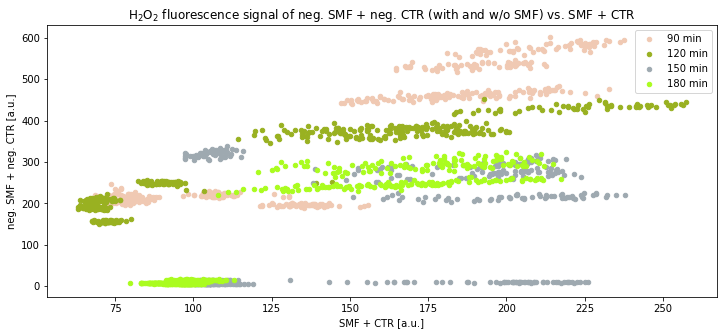

In [26]:
# Plotting all negative data vs. experimental data with and withut magnetic field 

colors = []
for i in range(len(xls.sheet_names)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

    
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
    
i = 0
while i < 4:
    df = pd.read_excel(xls, sheet_name=xls.sheet_names[i], usecols=cols)
    #df = df.iloc[250:300, :]
    df = df.dropna()
    df.plot.scatter(ax=axes, x='SMF', y='neg', color=colors[i], label=str(90+30*i)+" min")
    i += 1
    
axes.legend()
plt.xlabel('SMF + CTR [a.u.]') 
plt.ylabel('neg. SMF + neg. CTR [a.u.]')
plt.title("H$_{2}$O$_{2}$ fluorescence signal of neg. SMF + neg. CTR (with and w/o SMF) vs. SMF + CTR")
plt.savefig('H2O2_total_FL_signal.png', bbox_inches='tight')
plt.show()


/Users/abasaltbahrami/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


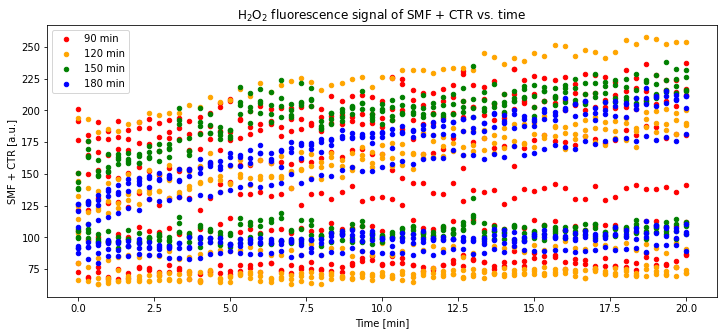

In [27]:
# plotting SMF and CTR within 20 minutes of H2O2 FL measurement
    

data = []
for i in range (0,4,1):
    list = pd.read_excel(xls, xls.sheet_names[i], usecols=cols)['SMF'].dropna()
    data.append(list)

time = []
for i in range(0, len(df90['SMF'].dropna())//8, 1):
    list = i*20/60
    j = 0
    while j < 8:
        time.append(list)
        j += 1

    
colors = ["Red", "Orange", "Green", "Blue"]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

i = 0
while i < 4:
    
    df={'SMF':data[i],'time':time}
    df = pd.DataFrame(data = df);
    df.plot.scatter(ax=axes, x='time', y='SMF', color=colors[i], label=str(90+30*i)+" min")
    i = i+1

axes.legend()
plt.xlabel('Time [min]') 
plt.ylabel('SMF + CTR [a.u.]')
plt.title("H$_{2}$O$_{2}$ fluorescence signal of SMF + CTR vs. time ")
plt.savefig('H2O2_SMF_CTR_FL_signal.png', bbox_inches='tight')
plt.show()

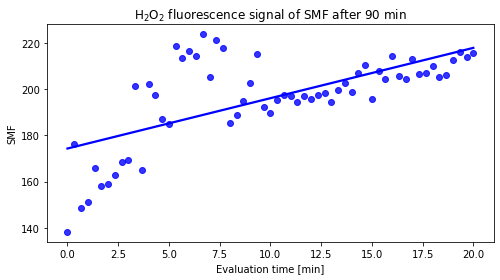

Slope: 2.178
Standard error of slope: 0.326


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# create DataFrame
SMF = []
CTR = []
time = []

for i in range(0, len(df90['SMF'].dropna())//8, 1):
    list = i*20/60
    time.append(list)

for i in range(0, len(df150['SMF'].dropna()), 8):
    listB = df150['SMF'].dropna()
    listB = listB.tolist()[i]
    SMF.append(listB)
for i in range(4, len(df150['SMF'].dropna()), 8):
    listB = df150['SMF'].dropna()
    listB = listB.tolist()[i]
    CTR.append(listB)

dict = {'SMF': SMF, 'CTR': CTR, 'Time': time}
df = pd.DataFrame(dict)
df.to_excel('out.xlsx', engine='xlsxwriter')

# calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Time'], df['SMF'])

# plot data and regression line
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
sns.regplot(ax=axes, x=df['Time'], y=df['SMF'], color="b", ci=None)
plt.title("H$_{2}$O$_{2}$ fluorescence signal of SMF after 90 min")
plt.xlabel('Evaluation time [min]')
plt.savefig('SMF_time.png', bbox_inches='tight')
plt.show()

# print slope and standard error
print("Slope: {:.3f}".format(slope))
print("Standard error of slope: {:.3f}".format(std_err))


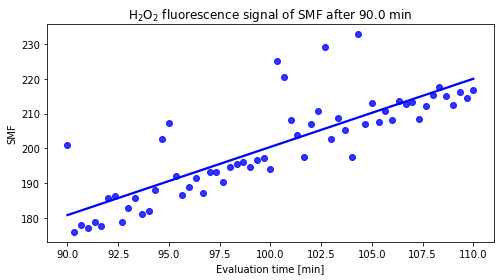

Slope 1: 2.385
Standard error of slope 1: 0.115


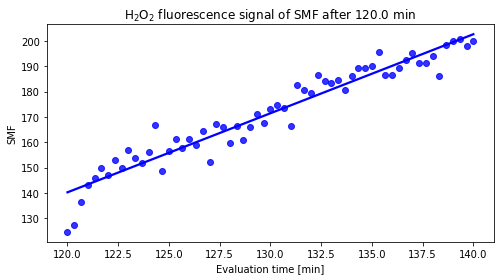

Slope 2: 3.504
Standard error of slope 2: 0.086


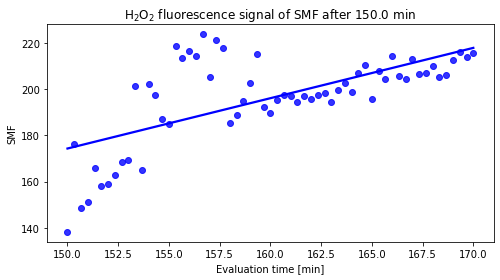

Slope 3: 0.390
Standard error of slope 3: 0.086


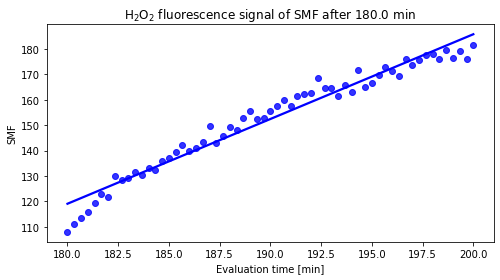

Slope 4: 3.788
Standard error of slope 4: 0.113


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

dfs = [(df90, 90), (df120, 120), (df150, 150), (df180, 180)]
SMFs = []
CTRs = []
times = []

for df, start_time in dfs:
    SMF = []
    CTR = []
    time = []
    for i in range(0, len(df['SMF'].dropna())//8, 1):
        list = i*20/60 + start_time
        time.append(list)
    for i in range(0, len(df['SMF'].dropna()), 8):
        listB = df['SMF'].dropna()
        listB = listB.tolist()[i]
        SMF.append(listB)
    for i in range(4, len(df['SMF'].dropna()), 8):
        listB = df['SMF'].dropna()
        listB = listB.tolist()[i]
        CTR.append(listB)
    SMFs.append(SMF)
    CTRs.append(CTR)
    times.append(time)

dicts = [{'SMF': SMF, 'CTR': CTR, 'Time': time}
         for SMF, CTR, time in zip(SMFs, CTRs, times)]
dfs = [pd.DataFrame(dict) for dict in dicts]

for i, df in enumerate(dfs):
    if i == 2:
        df = df.drop(df[(df['Time'] >= 300) & (df['Time'] <= 500)].index)
    df.to_excel(f'out_{i+1}.xlsx', engine='xlsxwriter')
    slope, intercept, r_value, p_value, std_err = linregress(
        df['Time'], df['CTR'])
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
    sns.regplot(ax=axes, x=df['Time'], y=df['SMF'], color="b", ci=None)
    plt.title(
        f"H$_{{2}}$O$_{{2}}$ fluorescence signal of SMF after {dfs[i]['Time'].iloc[0]} min")
    plt.xlabel('Evaluation time [min]')
    plt.savefig(f'SMF_time_{i+1}.png', bbox_inches='tight')
    plt.show()
    print(f"Slope {i+1}: {slope:.3f}")
    print(f"Standard error of slope {i+1}: {std_err:.3f}")


# Bar plots CTR vs. SMF

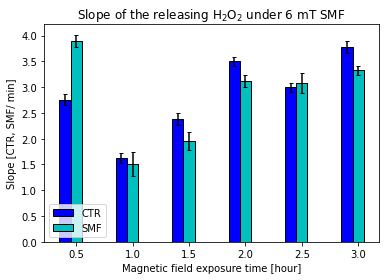

In [30]:
# SMF and CTR vs. time of exposure to the magnetic field

barWidth = 0.2 
 
m_SMF = [3.90, 1.51, 1.95, 3.120, 3.087, 3.33]
m_CTR = [2.76, 1.62, 2.38, 3.50, 3.0, 3.78]
  
yer1 = [0.117, 0.230, 0.175, 0.113, 0.191, 0.089]
yer2 = [0.1, 0.1, 0.115, 0.086, 0.087, 0.113]
  
r1 = np.arange(len(m_SMF)) 
r2 = [x + barWidth for x in r1] 
  
plt.bar(r1, m_CTR, width = barWidth, color = 'b', edgecolor = 'black', yerr=yer2, capsize=2, label='CTR') 
plt.bar(r2, m_SMF, width = barWidth, color = 'c', edgecolor = 'black', yerr=yer1, capsize=2, label='SMF')  

plt.xticks([r + barWidth for r in range(len(m_SMF))], ['0.5', '1.0', '1.5', '2.0', '2.5', '3.0']) 

plt.xlabel('Magnetic field exposure time [hour]')
plt.ylabel('Slope [CTR, SMF/ min]') 
plt.legend() 
plt.title('Slope of the releasing H$_{2}$O$_{2}$ under 6 mT SMF')
plt.savefig('Slope_CTR_SMF_time.png', bbox_inches='tight', dpi=300)
plt.show()


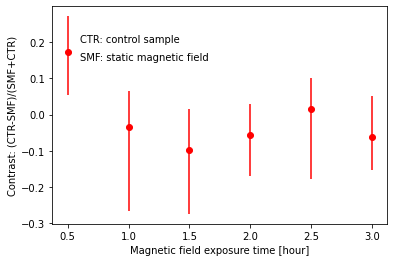

In [31]:
import matplotlib.pyplot as plt

time = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
m_SMF_CTR = [(-m_CTR[i]+m_SMF[i])/(m_SMF[i] + m_CTR[i])
             for i in range(len(m_SMF))]

fig, ax = plt.subplots()

# Plot the (SMF-CTR)/(SMF+CTR) data points with error bars
ax.errorbar(time, m_SMF_CTR, yerr=[yer1, yer2], fmt='o', color='red')

ax.set_xlabel('Magnetic field exposure time [hour]')
ax.set_ylabel('Contrast: (CTR-SMF)/(SMF+CTR)')
plt.text(0.6, 0.2, 'CTR: control sample', fontsize=10)
plt.text(0.6, 0.15, 'SMF: static magnetic field', fontsize=10)
# ax.set_title('(SMF-CTR)/(SMF+CTR) vs. magnetic field exposure time')
plt.savefig('SMF_CTR_ratio_errorbar_scatterplot_0.png',
            bbox_inches='tight', dpi=300)
plt.show()


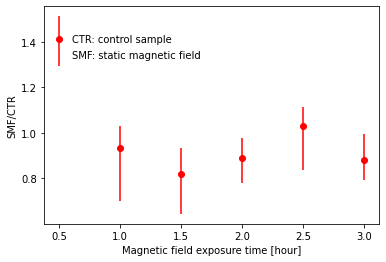

In [32]:
import matplotlib.pyplot as plt

time = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

m_SMF_CTR = [(m_SMF[i]/m_CTR[i])
             for i in range(len(m_SMF))]

fig, ax = plt.subplots()

# Plot the (SMF-CTR)/(SMF+CTR) data points with error bars
ax.errorbar(time, m_SMF_CTR, yerr=[yer1, yer2], fmt='o', color='red')

ax.set_xlabel('Magnetic field exposure time [hour]')
ax.set_ylabel('SMF/CTR')
plt.text(0.6, 1.4, 'CTR: control sample', fontsize=10)
plt.text(0.6, 1.33, 'SMF: static magnetic field', fontsize=10)
# ax.set_title('(SMF-CTR)/(SMF+CTR) vs. magnetic field exposure time')
plt.savefig('SMF_CTR_ratio_errorbar_scatterplot_1.png',
            bbox_inches='tight', dpi=300)
plt.show()


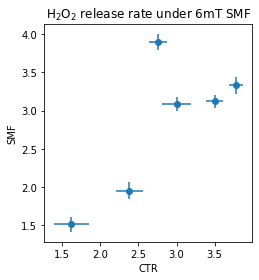

In [1]:
import matplotlib.pyplot as plt

m_SMF = [3.90, 1.51, 1.95, 3.120, 3.087, 3.33]
m_CTR = [2.76, 1.62, 2.38, 3.50, 3.0, 3.78]

error_SMF = [0.117, 0.230, 0.175, 0.113, 0.191, 0.089]
error_CTR = [0.1, 0.1, 0.115, 0.086, 0.087, 0.113]

fig, ax = plt.subplots()

ax.errorbar(m_CTR, m_SMF, xerr=error_SMF, yerr=error_CTR, fmt='o')
ax.set_xlabel('CTR')
ax.set_ylabel('SMF')
ax.set_title('H$_{2}$O$_{2}$ release rate under 6mT SMF')
ax.set_aspect('equal')

plt.savefig('SMF_CTR_Equal.png', dpi=500)
